In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
import random

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
# 载入数据
# 载入数据，数据载入的时候就已经划分好训练集和测试集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

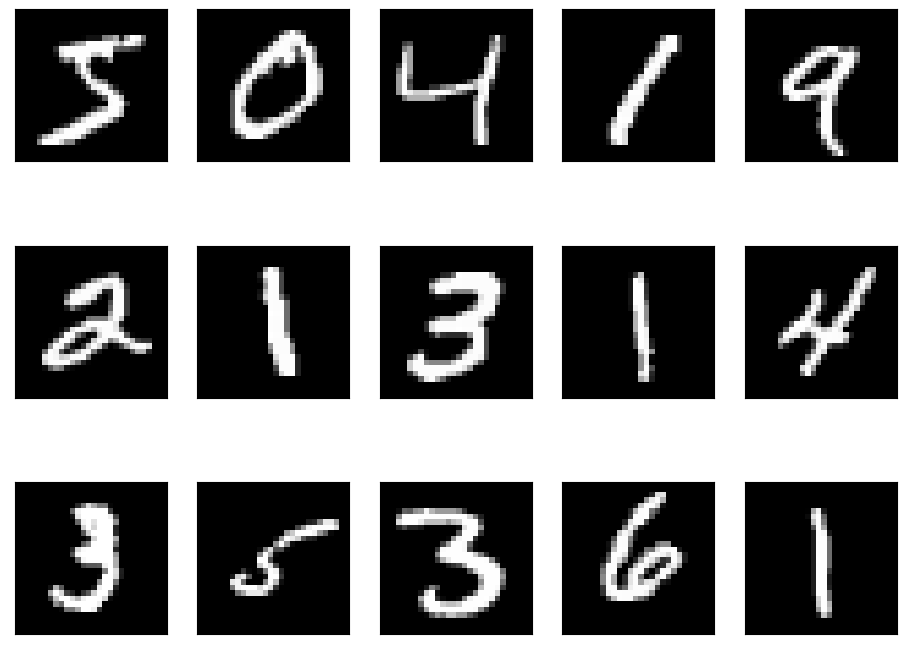

In [3]:
#画图 3行5列
n_row=3
n_col=5
plt.figure(figsize=(1.8*n_col,2.4*n_row))
plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.35)
for i in range(n_row*n_col):
    plt.subplot(n_row,n_col,i+1)
    plt.imshow(x_train[i],cmap=plt.cm.gray)#plt.cm.gray看灰度图
    plt.xticks(())#去掉x坐标
    plt.yticks(())


plt.show()

In [4]:
# 灰度函数返回数字
def plot_digit(digit, dem = 28, font_size = 12):
    max_ax = font_size * dem

    fig = plt.figure(figsize=(13, 13))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black = '#000000'

    for idx in range(dem):
        for jdx in range(dem):

            t = plt.text(idx * font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize = font_size, color = black)
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c, c, c), alpha = 0.5, edgecolor = 'black'))

    plt.show()

6


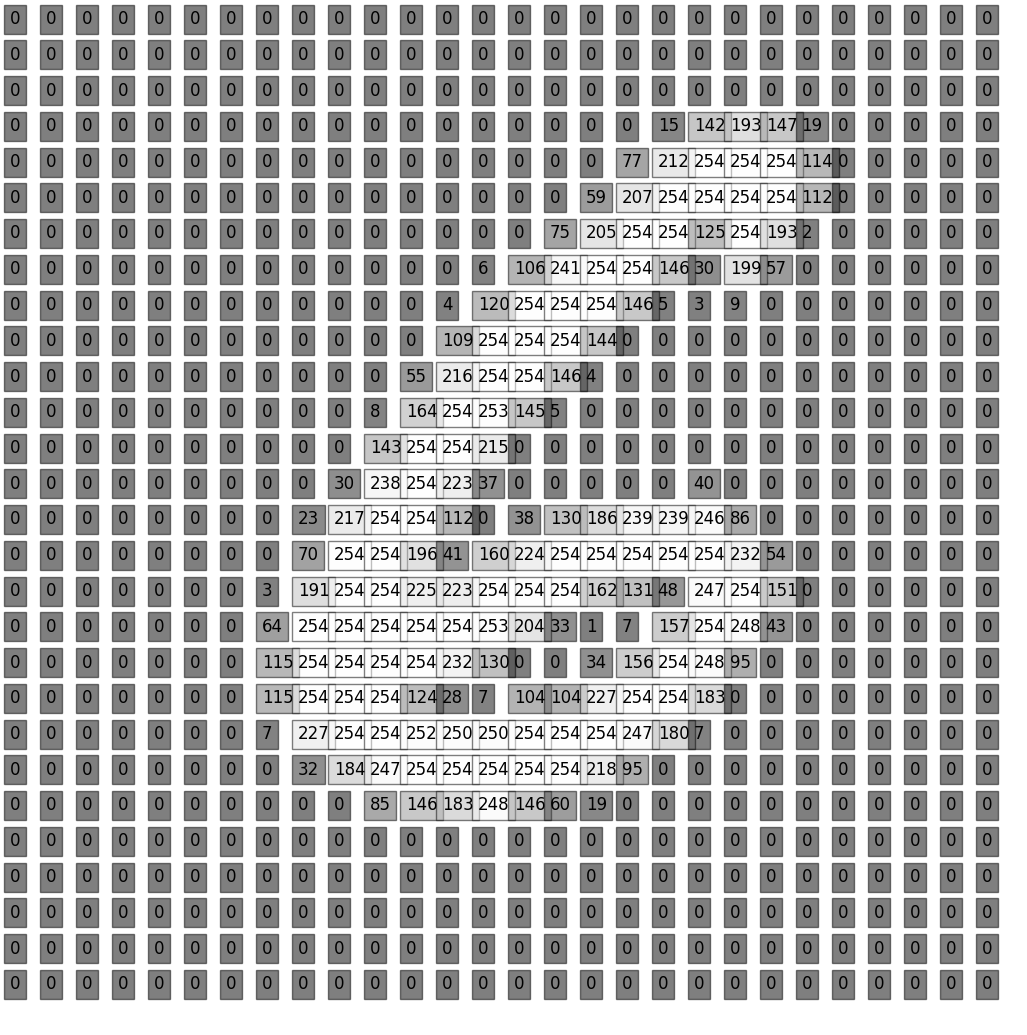

In [5]:
train_images_plot = x_train.reshape(-1, 28, 28)

rand_number = random.randint(0, len(y_train))
print(y_train[rand_number])
plot_digit(train_images_plot[rand_number])

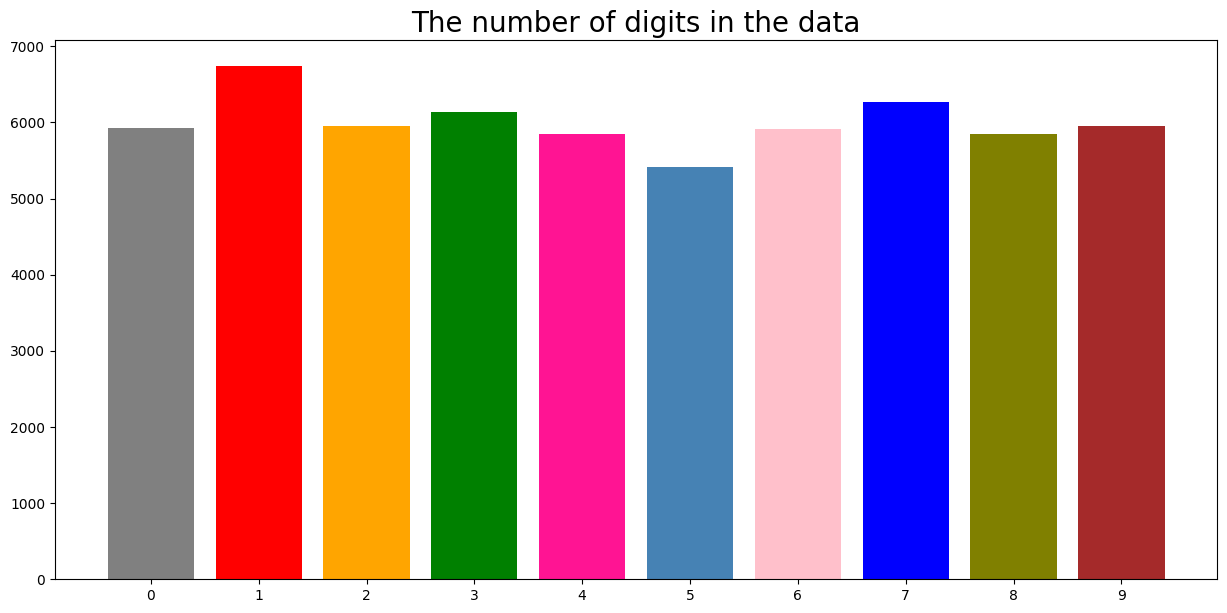

In [6]:
digit_range = np.arange(10)

###########
train_labels=pd.Series(y_train)

val = train_labels.value_counts().index
cnt = train_labels.value_counts().values
mycolors = ['red', 'blue', 'green', 'orange', 'brown', 'grey', 'pink', 'olive', 'deeppink', 'steelblue']

plt.figure(figsize = (15, 7))
plt.title("The number of digits in the data", fontsize = 20)
plt.xticks(range(10))
plt.bar(val, cnt, color = mycolors);

In [7]:
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0

In [8]:
# 把训练集和测试集的标签转为独热编码
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [9]:
# 定义顺序模型
model = Sequential()

In [10]:
model.add(Convolution2D(
input_shape = (28,28,1),
filters = 32,
kernel_size = 5,
strides = 1,
padding = 'same',
activation = 'relu'
))

In [11]:
model.add(MaxPooling2D(
pool_size = 2,
strides = 2,
padding = 'same',
))

In [12]:
model.add(Convolution2D(64,5,strides=1,padding='same',activation='relu'))

In [13]:
model.add(MaxPooling2D(2,2,'same'))
model.add(Flatten())

In [14]:
# 第一个全连接层
model.add(Dense(1024,activation = 'relu'))
# Dropout
model.add(Dropout(0.5))
# 第二个全连接层
model.add(Dense(10,activation='softmax'))

In [15]:
# 定义优化器
adam = Adam(lr=1e-4)
# 定义优化器，loss function，训练过程中计算准确率
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
# 训练模型
model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test, y_test))
# 保存模型
model.save('mnist.h5')

Epoch 1/10


D:\exercise_w\vippython\venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


938/938 [==============================] - 52s 55ms/step - loss: 0.3443 - accuracy: 0.9004 - val_loss: 0.0940 - val_accuracy: 0.9711
Epoch 2/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0955 - accuracy: 0.9713 - val_loss: 0.0584 - val_accuracy: 0.9812
Epoch 3/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0666 - accuracy: 0.9800 - val_loss: 0.0413 - val_accuracy: 0.9855
Epoch 4/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0356 - val_accuracy: 0.9881
Epoch 5/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0432 - accuracy: 0.9870 - val_loss: 0.0292 - val_accuracy: 0.9903
Epoch 6/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0283 - val_accuracy: 0.9899
Epoch 7/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0260 - val_accuracy: 0.9913
Epo